In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('DataSet/o3.csv', parse_dates=['Date Local'])
date = dataset["Date Local"]
means = dataset.iloc[:, 2].values
print(means)

[0.0225   0.0225   0.0225   0.0225   0.013375 0.013375 0.013375 0.013375
 0.007958 0.007958 0.007958 0.007958 0.014167 0.014167 0.014167 0.014167
 0.006667 0.006667 0.006667 0.006667 0.01175  0.01175  0.01175  0.01175
 0.011625 0.011625 0.011625 0.011625 0.00975  0.00975  0.00975  0.00975
 0.010792 0.010792 0.010792 0.010792 0.008458 0.008458 0.008458 0.008458
 0.008417 0.008417 0.008417 0.008417 0.008208 0.008208 0.008208 0.008208
 0.006167 0.006167 0.006167 0.006167 0.008708 0.008708 0.008708 0.008708
 0.010625 0.010625 0.010625 0.010625 0.01075  0.01075  0.01075  0.01075
 0.008375 0.008375 0.008375 0.008375 0.006333 0.006333 0.006333 0.006333
 0.006958 0.006958 0.006958 0.006958 0.0085   0.0085   0.0085   0.0085
 0.008542 0.008542 0.008542 0.008542 0.010583 0.010583 0.010583 0.010583
 0.016292 0.016292 0.016292 0.016292 0.011417 0.011417 0.011417 0.011417
 0.009917 0.009917 0.009917 0.009917]


In [3]:
def wrangle(df):
    
    df["Date Local"]=pd.to_datetime(df["Date Local"])
    df["Month"]=df["Date Local"].dt.month
    df["Year"]=df["Date Local"].dt.year
    df=df.drop("Date Local",axis=1)
    df=df.drop("Month",axis=1)
    df=df[df.Year>=1850]
    df=df.set_index(['Year'])
    #date=df.iloc[:,:0]
    
    
    df=df.dropna()
    
    return df

In [4]:
dataset = wrangle(dataset)

In [5]:
dataset

,O3 Units,O3 Mean
Year,,
1917,Parts per million,0.022500
1918,Parts per million,0.022500
1919,Parts per million,0.022500
1920,Parts per million,0.022500
1921,Parts per million,0.013375
...,...,...
2012,Parts per million,0.011417
2013,Parts per million,0.009917
2014,Parts per million,0.009917


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1917 to 2016
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   O3 Units  100 non-null    object 
 1   O3 Mean   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [7]:
dataset = dataset.drop(columns=['O3 Units'],axis=1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1917 to 2016
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   O3 Mean  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [9]:
year_temp=[]
for i in range(len(date)):
    year_temp.append(date[i].year) 
year_temp = np.array(year_temp)
year_temp = year_temp.reshape(-1, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(year_temp,means,test_size=0.1,random_state=10)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
year_temp_poly = poly_reg.fit_transform(year_temp)
poly_reg.fit(year_temp_poly, means)

PolynomialFeatures(degree=3)

In [12]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(year_temp_poly, means)

LinearRegression()

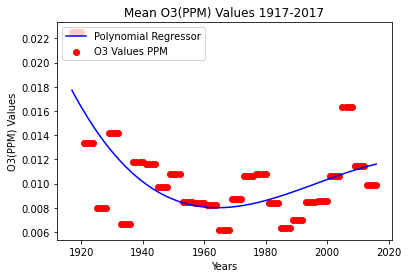

In [13]:
plt.scatter(year_temp, means, color = 'red',label="O3 Values PPM")
plt.plot(year_temp, lin_reg_2.predict(poly_reg.fit_transform(year_temp)), color = 'blue',label="Polynomial Regressor")
plt.title("Mean O3(PPM) Values 1917-2017")
plt.xlabel("Years")
plt.ylabel("O3(PPM) Values")
plt.legend(loc="upper left")
plt.show()

In [14]:
z = lin_reg_2.predict(poly_reg.fit_transform(year_temp))

from sklearn.metrics import mean_squared_error
print("The Mean Squared Error is ",round(mean_squared_error(means, z),4))

#Mean Square Error

The Mean Squared Error is  0.0


In [15]:
print(lin_reg_2.predict(poly_reg.fit_transform([[2050]])))
#print(dataset_2.loc[len(dataset_2)-1,"ANNUAL"])

[0.01038647]
